In [135]:
import pandas as pd
import os

dir = r'data/energia/ceny/'

files = os.listdir(dir)


In [136]:
files = sorted(files)

In [197]:
from datetime import datetime, timedelta

def format(raw_data):
    df = raw_data.copy()
    a_mask = df['Godzina'].apply(lambda x: 'A' in str(x))
    df.drop(index=df[a_mask].index, inplace=True)
    df['Godzina'] = df['Godzina'].astype(str)
    mask = (df['Godzina'] == '24')
    df['Godzina'] = df['Godzina'].replace({'24': '0'}).apply(lambda x: x if len(x) > 1 else f'0{x}')
    tt = pd.to_datetime(df[['Data', 'Godzina']].astype(str).agg(' '.join, axis=1), format="%Y-%m-%d %H")
    tt.loc[mask] = tt.loc[mask].apply(lambda x: x + timedelta(days=1))
    df['Time'] = tt
    df.drop(columns=['Data', 'Godzina'], inplace=True)
    df.rename(columns={'RCE': 'Value'}, inplace=True)
    df['Value'] = df['Value'].replace({' ': '', '\xa0': '', ',': '.'}, regex=True)
    df['Value'] = pd.to_numeric(df['Value'])
    df.set_index('Time', inplace=True)
    return df


df = pd.concat([pd.read_csv(dir + file, sep=';', parse_dates=['Data'], encoding='windows-1252') for file in files], ignore_index=True)
df

,Data,Godzina,RCE
0,2018-01-01,1,"117,02"
1,2018-01-01,2,"114,00"
2,2018-01-01,3,"99,02"
3,2018-01-01,4,"92,07"
4,2018-01-01,5,"82,44"
...,...,...,...
43075,2022-12-31,20,"337,30"
43076,2022-12-31,21,"289,23"
43077,2022-12-31,22,"182,31"
43078,2022-12-31,23,"159,65"


In [199]:
df = format(df)

In [1]:
df.to_csv('data/energy_prices.csv')

NameError: name 'df' is not defined

In [68]:
import pandas as pd

df = pd.read_csv('data/energy_prices.csv', parse_dates=['Time'], index_col='Time')

In [85]:
from matplotlib import pyplot as plt

mask = (df.index >= '25.08.2022') & (df.index < '28.08.2022') 


# plt.legend(["Cena"])

C:\Users\wojte\AppData\Local\Temp\ipykernel_10076\1068050285.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  mask = (df.index >= '25.08.2022') & (df.index < '28.08.2022')


,Value
Time,
2022-08-25,1725.442083
2022-08-26,1731.745417
2022-08-27,1818.716667


C:\Users\wojte\AppData\Local\Temp\ipykernel_10076\3811991850.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  mask = (df.index > '1.01.2021') & (df.index < '31.12.2022')


Time
2021-01-03    121.225352
2021-01-10    193.041667
2021-01-17    207.821429
2021-01-24    190.261905
2021-01-31    242.035714
                 ...    
2022-11-27    190.583333
2022-12-04     96.714286
2022-12-11    138.494048
2022-12-18    234.857143
2022-12-25    197.430556
Freq: W-SUN, Name: Siła wiatru, Length: 104, dtype: float64

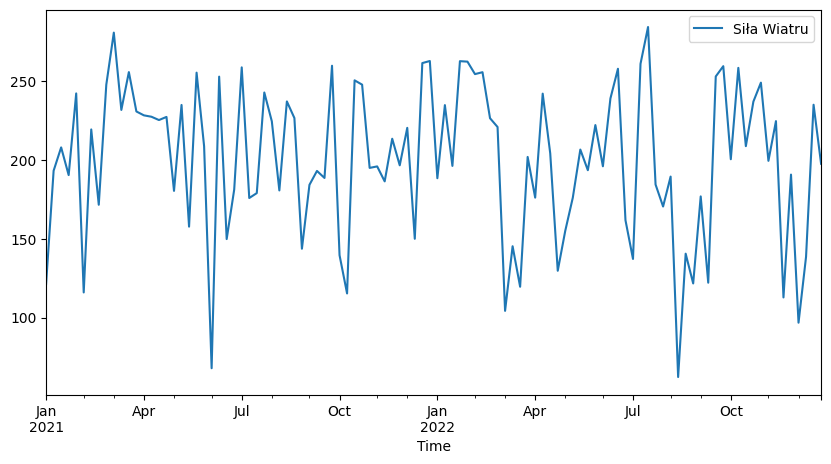

In [66]:
from matplotlib import pyplot as plt

mask = (df.index > '1.01.2021') & (df.index < '31.12.2022') 
df.loc[mask]['Siła wiatru'].resample('W').mean().plot(figsize=(10,5))

plt.legend(['Siła Wiatru'])
df.loc[mask]['Siła wiatru'].resample('W').mean()